   # Estudio Plotly 

## Importar librerias


In [65]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [ ]:
path = kagglehub.dataset_download("emonsharkar/python-learning-and-exam-performance-dataset")
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,NaN,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,NaN,3,3.5,62,1,47,1,0,3,7,24.8,0


In [60]:
sns.reset_orig()

Text(0.5, 1.0, 'Histograma Age con Seaborn')

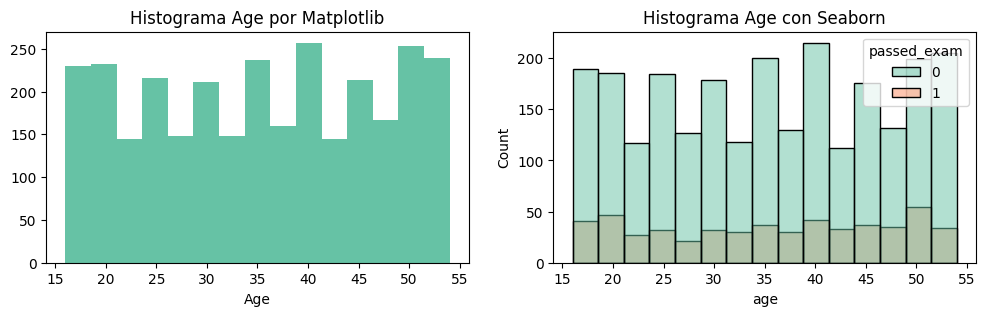

In [75]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2, figsize = (12,3))

axes[0].hist(df["age"], bins = 15)
axes[0].set_title("Histograma Age por Matplotlib")
axes[0].set_xlabel ("Age")

sns.histplot(df, x = "age", ax = axes[1], hue = "passed_exam")
axes[1].set_title("Histograma Age con Seaborn")




C:\Users\hemer\AppData\Local\Temp\ipykernel_4992\3098631079.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")


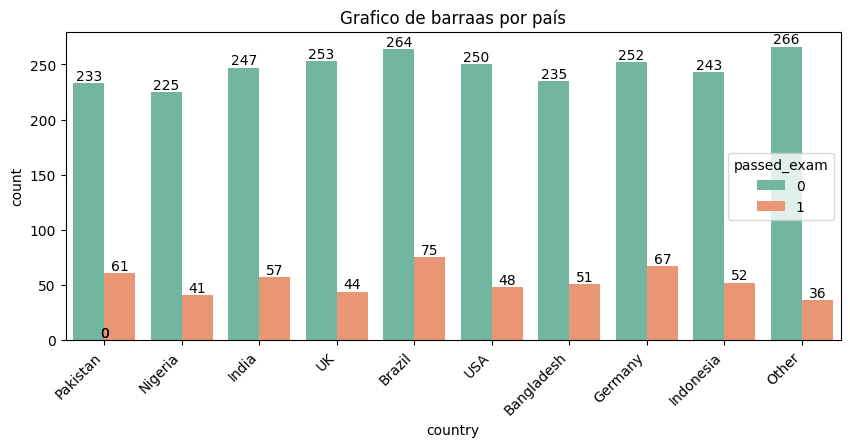

In [118]:
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(df, x = "country", hue = "passed_exam")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")
ax.set_title("Grafico de barraas por país")
#ax.set_ylim(0,400)

for p in ax.patches:
    alto = int(p.get_height())
    centro = p.get_x() + p.get_width()/2
    ax.annotate(
        int(p.get_height()),
        (centro, int(p.get_height())),
        ha = "center",
        va = "bottom"
                )
    





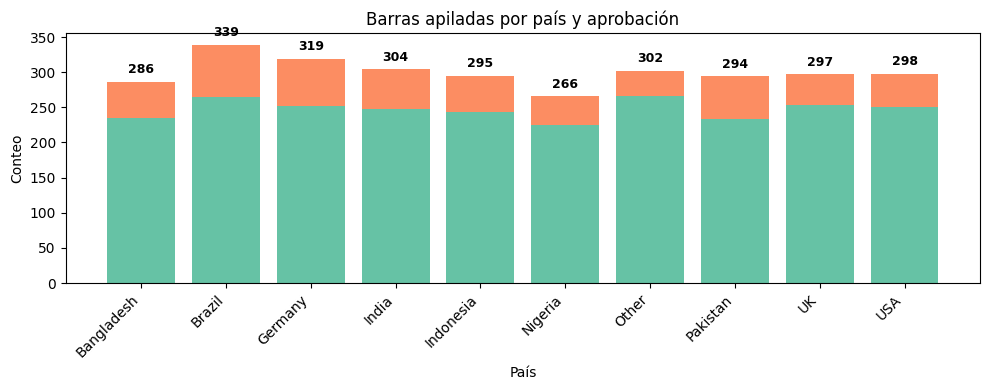

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # solo si quieres usarlo para otros plots

# 1) Calcular conteos por país y clase
counts = df.groupby(["country", "passed_exam"]).size().unstack(fill_value=0)

# 2) Crear barras apiladas
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(counts.index, counts[0])
ax.bar(counts.index, counts[1], bottom=counts[0])

# 3) Rotar etiquetas
ax.set_xticks(range(len(counts.index)))
ax.set_xticklabels(counts.index, rotation=45, ha="right")

# 4) Agregar totales encima del stack
for i, country in enumerate(counts.index):
    total = counts.loc[country].sum()
    ax.annotate(
        f"{int(total)}",
        (i, total),
        xytext=(0, 4),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold"
    )

ax.set_title("Barras apiladas por país y aprobación")
ax.set_xlabel("País")
ax.set_ylabel("Conteo")

plt.tight_layout()
plt.show()


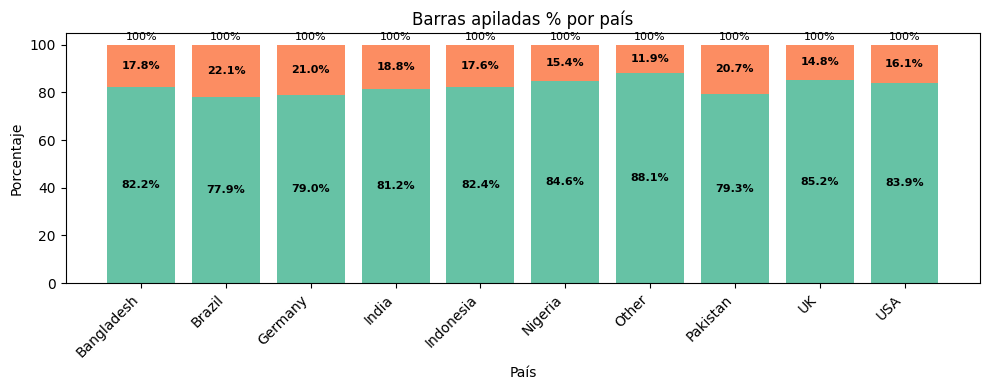

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Conteos por país y clase
counts = df.groupby(["country", "passed_exam"]).size().unstack(fill_value=0)

# 2) Convertir a porcentaje por fila (país)
counts_pct = counts.div(counts.sum(axis=1), axis=0) * 100

# 3) Graficar barras apiladas 100%
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(counts_pct.index, counts_pct[0])
ax.bar(counts_pct.index, counts_pct[1], bottom=counts_pct[0])

# 4) Rotar etiquetas
ax.set_xticks(range(len(counts_pct.index)))
ax.set_xticklabels(counts_pct.index, rotation=45, ha="right")

# 5) Anotar % encima de cada segmento
for p in ax.patches:
    height = p.get_height()
    if height == 0:
        continue
    x_center = p.get_x() + p.get_width()/2
    y = p.get_y() + height/2  # centro vertical del segmento
    ax.annotate(
        f"{height:.1f}%",
        (x_center, y),
        ha="center", va="center",
        fontsize=8, fontweight="bold"
    )

# 6) Anotar total 100% arriba de cada barra (opcional)
for i, country in enumerate(counts_pct.index):
    ax.annotate(
        "100%",
        (i, 101),  # un poquito arriba
        ha="center", va="bottom", fontsize=8
    )

ax.set_title("Barras apiladas % por país")
ax.set_xlabel("País")
ax.set_ylabel("Porcentaje")

plt.tight_layout()
plt.show()


In [4]:
os.listdir()

['MODELAMIENTO_MONTO_FRAUDE.csv',
 'plotly_pythonLearning.ipynb',
 'repaso_GridSearch.ipynb',
 'Sklearn_1.ipynb',
 'Sklearn_pythonLearning.ipynb',
 'Tabla Trabajo Grupal N°2.xlsx',
 'Trabajo_2_Casallas_Figueroa_Gutierrez._Lucero_Machuca.ipynb']

## Carga de datos

## Graficas